<h1> <b> Lab - 11 </b> </h1>
<h3>Support Vector Machine</h3>
<br>

In [1]:
pip install -q tfds-nightly tensorflow matplotlib

     |████████████████████████████████| 4.2 MB 16.0 MB/s 
     |████████████████████████████████| 76 kB 6.5 MB/s 
     |████████████████████████████████| 462 kB 53.0 MB/s 


<br/><h2> <b> Import necessary modules.</b> </h2><br/>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

<br/><h2> <b> Load the data.</b> </h2><br/>


In [3]:
from tensorflow.keras.datasets import mnist
(features_train, targets_train), (features_test, targets_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


<br/><h2> <b> Convert to float32.</b> </h2><br/>

In [4]:
features_train, features_test = np.array(features_train, np.float32), np.array(features_test, np.float32)

<br/><h2> <b>Flatten images to 1-D vector of 784 features (28*28).</b> </h2><br/>

In [5]:
features_train, features_test = features_train.reshape([-1, 784]), features_test.reshape([-1, 784])

<br/><h2> <b>Normalize images value from [0, 255] to [0, 1].</b> </h2><br/>

In [6]:
features_train, features_test = features_train / 255., features_test / 255.

<br/><h2> <b>Visualize one of the images in data set.</b> </h2><br/>

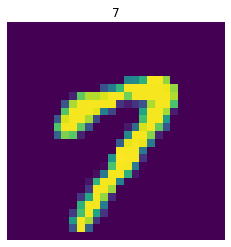

In [7]:
plt.imshow(features_train[15].reshape(28,28))
plt.axis("off")
plt.title(str(targets_train[15]))
plt.savefig('image.png')
plt.show()

<br/><h2> <b>SVM with 'linear' kernel.</b> </h2><br/>

In [8]:
clf = SVC(kernel = 'linear')

clf.fit(features_train, targets_train)

targets_predict = clf.predict(features_test)

In [9]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(targets_test, targets_predict))

print("Precision:",metrics.precision_score(targets_test, targets_predict, average="weighted"))

print("Recall:",metrics.recall_score(targets_test, targets_predict, average="weighted"))

Accuracy: 0.9404
Precision: 0.9404744228503641
Recall: 0.9404


<br/><h2> <b>SVM with 'polynomial' kernel.</b> </h2><br/>

In [10]:
poly_classifier = SVC(kernel="poly", degree = 3)

poly_classifier.fit(features_train, targets_train)

y_pred = poly_classifier.predict(features_test)

In [11]:
print("Accuracy:",metrics.accuracy_score(targets_test, y_pred))

print("Precision:",metrics.precision_score(targets_test, y_pred, average="weighted"))

print("Recall:",metrics.recall_score(targets_test, y_pred, average="weighted"))

Accuracy: 0.9771
Precision: 0.9771114199169968
Recall: 0.9771


<br/><h2> <b>SVM with 'rbf' kernel.</b> </h2><br/>

In [12]:
rbf_classifier = SVC(kernel = "rbf")

rbf_classifier.fit(features_train, targets_train)

y_pred = rbf_classifier.predict(features_test)

In [13]:
print("Accuracy:",metrics.accuracy_score(targets_test, y_pred))

print("Precision:",metrics.precision_score(targets_test, y_pred, average="weighted"))

print("Recall:",metrics.recall_score(targets_test, y_pred, average="weighted"))

Accuracy: 0.9792
Precision: 0.9792006017788697
Recall: 0.9792


# Observation

<br/><h2> <b>It is observed that there is no much difference between using different kernel functions like 'linear', 'polynomial', 'rbf'. However, we know that their approach of finding the decision boundary between the classes.</b> </h2><br/>